In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('hotel_bookings_data.csv') #memanggil file csv
pd.set_option('display.max_columns', None) #menampilkan semua kolom tanpa ada yang di hide karena terlalu banyak

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,0.0,0,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


# Data Preprocessing 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

kolom tidak lengkap = city, agent, company, children

## Handling Missing Values City

In [5]:
#mengisi kolom city berdasarkan kota terbanyak
avg_city = df['city'].value_counts().index[0]
print(avg_city)

Kota Denpasar


In [6]:
df['city'] = df['city'].fillna('Kota Denpasar')

## Handling Missing Values Agent

In [7]:
df['agent'] = df['agent'].fillna(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Handling Missing Values Company

In [9]:
df['company'] = df['company'].fillna('0')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Handling Missing Values Children

In [11]:
df['children'] = df['children'].fillna('0')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  object 
 11  babies                          119390 non-null  int64  
 12  meal            

## Handling Invalid Values

In [13]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [14]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [15]:
df['meal'] = df['meal'].replace('Undefined', 'No Meal') #mengganti nilai Undefined menjadi No Meal

In [16]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

## Handling Unnecessary Data

In [17]:
df['total_customers'] = df['adults'] +  df['children'].astype(int) + df['babies']

In [18]:
df = df.drop(['adults','children','babies'], axis = 1)

# Monthly Hotel Booking Analysis Based on Hotel Type

In [19]:

df[['arrival_date_month']]
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['arrival_date_month'] = df['arrival_date_month'].map(month_map)
df = df.sort_values('arrival_date_month')

result = df.groupby(['hotel','arrival_date_year', 'arrival_date_month'])['total_customers'].count().reset_index()
result['arrival_date_year'] = result['arrival_date_year'].replace(2017,2019)
result = result.groupby(['hotel','arrival_date_year', 'arrival_date_month'])['total_customers'].sum().reset_index()
result

,hotel,arrival_date_year,arrival_date_month,total_customers
0,City Hotel,2018,1,3122
1,City Hotel,2018,2,2478
2,City Hotel,2018,3,1364
3,City Hotel,2018,4,2371
4,City Hotel,2018,5,3046
5,City Hotel,2018,6,3561
6,City Hotel,2018,7,3676
7,City Hotel,2018,8,3923
8,City Hotel,2018,9,3131
9,City Hotel,2018,10,3378


In [20]:
x = result.groupby(['hotel', 'arrival_date_month'])['total_customers'].mean().reset_index()

month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
x['arrival_date_month'] = x['arrival_date_month'].map(month_map)
x

,hotel,arrival_date_month,total_customers
0,City Hotel,January,2178.5
1,City Hotel,February,2066.0
2,City Hotel,March,1868.0
3,City Hotel,April,2482.5
4,City Hotel,May,3229.0
5,City Hotel,June,3740.0
6,City Hotel,July,4116.0
7,City Hotel,August,3947.0
8,City Hotel,September,4044.0
9,City Hotel,October,4491.5


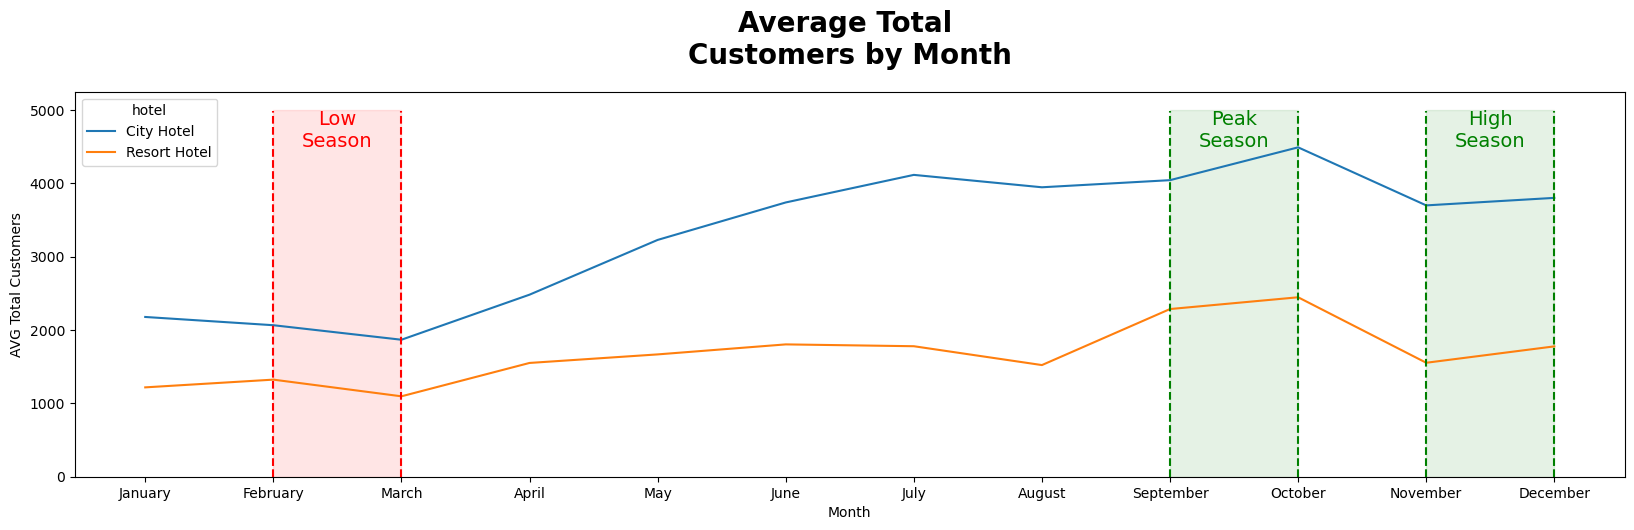

In [21]:
plt.figure(figsize=(20,5))
sns.lineplot(x='arrival_date_month', y='total_customers', data=x, hue='hotel')
plt.xlabel('Month')
plt.ylabel('AVG Total Customers')
plt.title('Average Total \nCustomers by Month', fontsize=20, fontweight='bold', y=1.05)

plt.axvline(x=1, color='red', linestyle='--', ymax= 0.95)
plt.axvline(x=2, color='red', linestyle='--', ymax= 0.95)
plt.stackplot(np.arange(1,3), [5000], color='red', alpha=0.1)
plt.text(x=1.5, y=4500, s='Low\nSeason', color='red', fontsize=14, ha='center')

plt.axvline(x=8, color='green', linestyle='--', ymax= 0.95)
plt.axvline(x=9, color='green', linestyle='--', ymax= 0.95)
plt.stackplot(np.arange(8,10), [5000], color='green', alpha=0.1)
plt.text(x=8.5, y=4500, s='Peak\nSeason', color='green', fontsize=14, ha='center')

plt.axvline(x=10, color='green', linestyle='--', ymax= 0.95)
plt.axvline(x=11, color='green', linestyle='--', ymax= 0.95)
plt.stackplot(np.arange(10,12), [5000], color='green', alpha=0.1)
plt.text(x=10.5, y=4500, s='High\nSeason', color='green', fontsize=14, ha='center')

plt.show()

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [22]:

df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_customers
59694,City Hotel,1,166,2018,1,45,1,0,3,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,236.0,0,0,Personal,110.0,0,0,Canceled,1


In [23]:
df['stay_duration'] = df['stays_in_weekdays_nights'] + df['stays_in_weekend_nights']

In [24]:
x = df.groupby(['stay_duration'])['total_customers'].count().reset_index()
x = x[x['stay_duration'] != 0]
x

,stay_duration,total_customers
1,1,21020
2,2,27643
3,3,27076
4,4,17383
5,5,7784
6,6,3857
7,7,8655
8,8,1161
9,9,841
10,10,1139


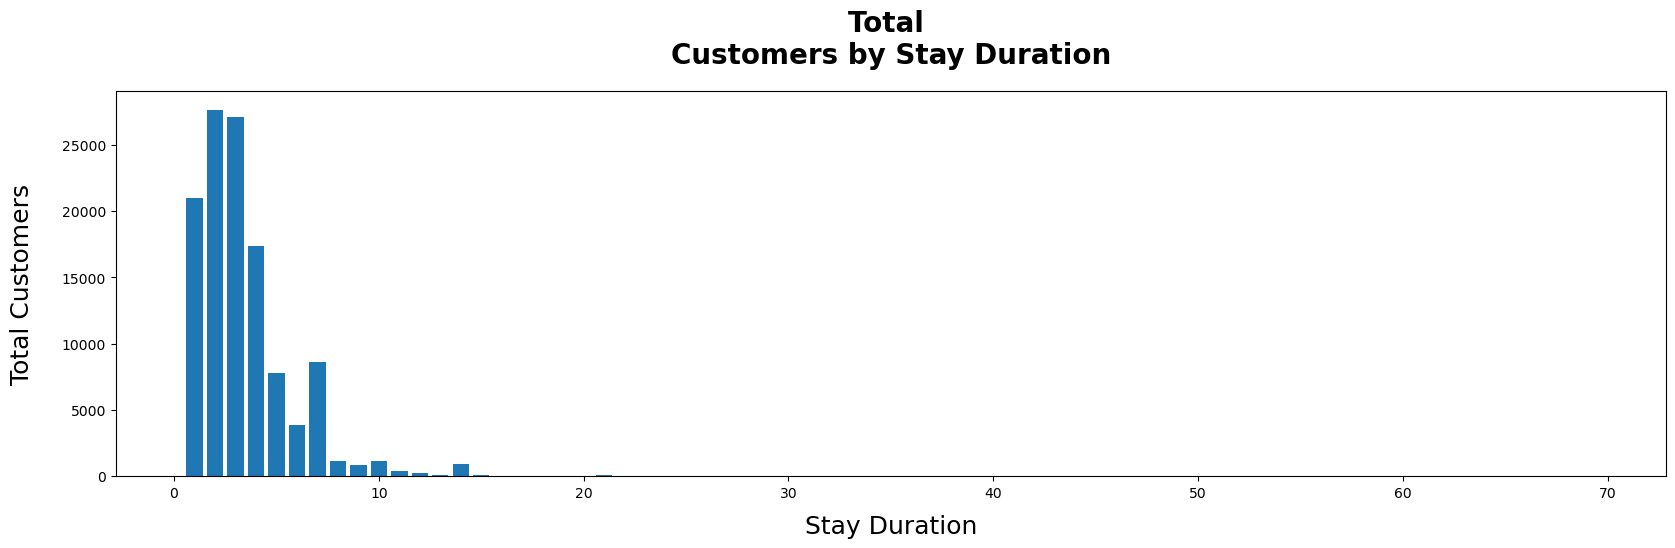

In [25]:
plt.figure(figsize=(20,5))
plt.bar(x['stay_duration'], x['total_customers'])
plt.xlabel('Stay Duration', fontsize=18, labelpad=10)
plt.ylabel('Total Customers', fontsize=18, labelpad=20)
plt.title('Total \nCustomers by Stay Duration', fontsize=20, fontweight='bold', y=1.05)
plt.show()


In [26]:
df['duration'] = df['stay_duration'].apply(lambda value: 'A few days' if value < 7 else ('A few weeks' if value <= 31 else ('Several months')))
df['duration'].value_counts()
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_customers,stay_duration,duration
59694,City Hotel,1,166,2018,1,45,1,0,3,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,236.0,0,0,Personal,110.00,0,0,Canceled,1,3,A few days
101864,City Hotel,0,36,2018,1,47,15,0,5,Breakfast,Kota Jakarta Timur,Online TA,TA/TO,0,0,0,0,No Deposit,7.0,0,0,Personal,64.67,0,1,Check-Out,2,5,A few days
101863,City Hotel,0,47,2018,1,47,16,0,4,Breakfast,Kabupaten Belitung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,0,Personal,88.40,0,1,Check-Out,2,4,A few days
101862,City Hotel,0,26,2018,1,47,16,0,4,Breakfast,Kabupaten Demak,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,0,Personal,88.40,0,1,Check-Out,2,4,A few days
101861,City Hotel,0,59,2018,1,47,17,0,3,Breakfast,Kota Yogyakarta,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,28.0,0,0,Personal,75.00,0,0,Check-Out,2,3,A few days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17589,Resort Hotel,0,4,2017,12,42,13,0,2,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,250.0,0,0,Personal,76.00,0,2,Check-Out,2,2,A few days
17590,Resort Hotel,0,0,2017,12,42,12,1,2,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0,0,Personal,62.00,1,1,Check-Out,2,3,A few days
17591,Resort Hotel,0,287,2017,12,42,15,1,3,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,2,No Deposit,0.0,223.0,0,Family,46.50,1,1,Check-Out,2,4,A few days
44254,City Hotel,0,164,2017,12,40,2,0,2,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,19.0,0,0,Family,100.00,0,0,Check-Out,1,2,A few days


In [27]:
df[['duration']].value_counts()

duration      
A few days        105478
A few weeks        13888
Several months        24
dtype: int64

In [28]:
x = df[df['is_canceled'] == 0].groupby(['hotel','duration'])['is_canceled'].count().reset_index()
y = df[df['is_canceled'] == 1].groupby(['hotel','duration'])['is_canceled'].count().reset_index()
x['canceled'] = y['is_canceled']
x.columns = ['hotel', 'duration','not canceled','canceled']
x['rasio'] = x['canceled'] / (x['not canceled']+x['canceled']) * 100
x

,hotel,duration,not canceled,canceled,rasio
0,City Hotel,A few days,44405,31618,41.590045
1,City Hotel,A few weeks,1818,1482,44.909091
2,City Hotel,Several months,5,2,28.571429
3,Resort Hotel,A few days,21697,7758,26.338482
4,Resort Hotel,A few weeks,7227,3361,31.743483
5,Resort Hotel,Several months,14,3,17.647059


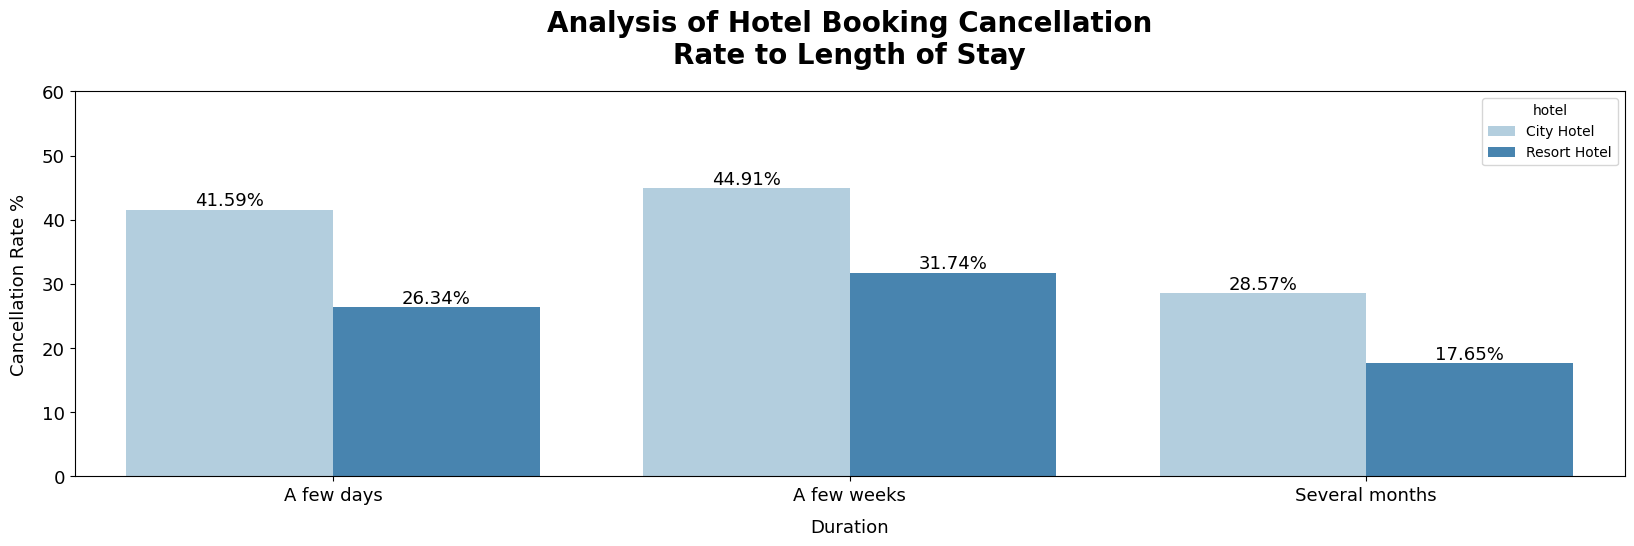

In [29]:
plt.figure(figsize=(20,5))
g = sns.barplot(x='duration', y='rasio', data=x, hue='hotel', palette='Blues')
plt.xlabel('Duration', fontsize=13, labelpad=10)
plt.ylabel('Cancellation Rate %', fontsize=13, labelpad=10)
plt.title('Analysis of Hotel Booking Cancellation\nRate to Length of Stay', fontsize=20, fontweight='bold', y=1.05)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.bar_label(g.containers[0], fontsize=13, label_type='edge',fmt='%.2f%%')
plt.bar_label(g.containers[1], fontsize=13,fmt='%.2f%%')
plt.ylim(0,60)
plt.show()

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [30]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_customers,stay_duration,duration
59694,City Hotel,1,166,2018,1,45,1,0,3,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,236.0,0,0,Personal,110.00,0,0,Canceled,1,3,A few days
101864,City Hotel,0,36,2018,1,47,15,0,5,Breakfast,Kota Jakarta Timur,Online TA,TA/TO,0,0,0,0,No Deposit,7.0,0,0,Personal,64.67,0,1,Check-Out,2,5,A few days


In [31]:
df['category_lead_time'] = df['lead_time'].apply(lambda value: 'A day' if value == 0 else ('A few days' if value <= 7 else ('A few weeks' if value <= 31 else ('A few months'))))

In [32]:
x = df[df['is_canceled'] == 0].groupby(['hotel','category_lead_time'])['is_canceled'].count().reset_index()
y = df[df['is_canceled'] == 1].groupby(['hotel','category_lead_time'])['is_canceled'].count().reset_index()
x['canceled'] = y['is_canceled']
x = x.rename(columns={'is_canceled': 'not_canceled'})
x['Cancellation_rate'] = x['canceled']/(x['not_canceled'] +x['canceled']) * 100
x

,hotel,category_lead_time,not_canceled,canceled,Cancellation_rate
0,City Hotel,A day,2836,273,8.780959
1,City Hotel,A few days,6653,1046,13.586180
2,City Hotel,A few months,27773,27771,49.998200
3,City Hotel,A few weeks,8966,4012,30.913854
4,Resort Hotel,A day,3079,157,4.851669
5,Resort Hotel,A few days,5276,426,7.471063
6,Resort Hotel,A few months,15376,9079,37.125332
7,Resort Hotel,A few weeks,5207,1460,21.898905


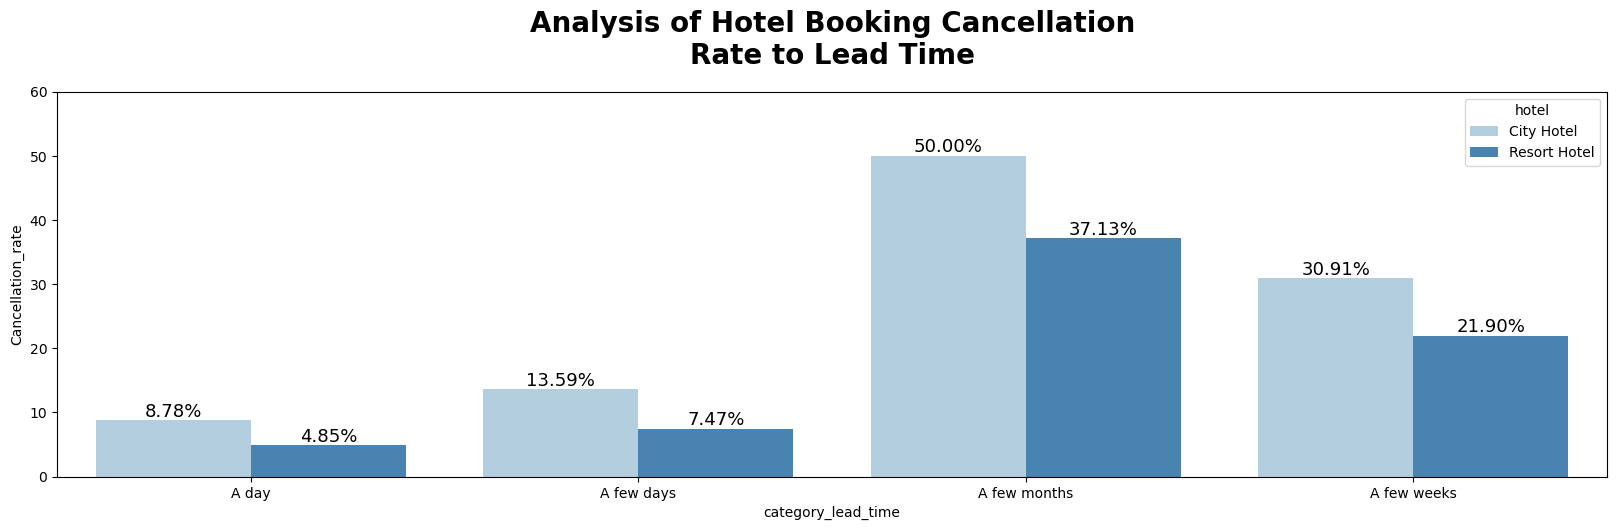

In [37]:
plt.figure(figsize=(20,5))
y = sns.barplot(x='category_lead_time', y='Cancellation_rate', data=x, hue='hotel', palette='Blues')
plt.title('Analysis of Hotel Booking Cancellation\nRate to Lead Time', fontsize=20, fontweight='bold', y=1.05)
plt.bar_label(y.containers[0], fontsize=13, label_type='edge',fmt='%.2f%%')
plt.bar_label(y.containers[1], fontsize=13, label_type='edge',fmt='%.2f%%')
plt.ylim(0,60)
plt.show()